In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/AIML Course/Datasets/mnist_with_labels.csv'

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
print(data.head(10))

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      5       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      4       0       0       0       0       0       0       0       0   
3      1       0       0       0       0       0       0       0       0   
4      9       0       0       0       0       0       0       0       0   
5      2       0       0       0       0       0       0       0       0   
6      1       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      1       0       0       0       0       0       0       0       0   
9      4       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1      

In [ ]:
data = np.array(data)

In [ ]:
m, n = data.shape
print(data.shape)

(70000, 785)


In [ ]:
np.random.shuffle(data)


In [ ]:
print(data)

[[8 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [6 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]]


In [ ]:
data_dev = data[0:1000].T


In [ ]:
print(data_dev)

[[8 9 4 ... 7 1 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [ ]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(784, 69000)
(69000,)


In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [ ]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [ ]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [ ]:
def ReLU_deriv(Z):
    return Z > 0 #check

In [ ]:
print(3*ReLU_deriv(2))

3


In [ ]:
print(3*ReLU_deriv(0))

0


In [ ]:
ReLU_deriv(2)

True

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = dZ2.dot(A1.T)
  db2 = np.sum(dZ2)

  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = dZ1.dot(X.T)
  db1 = np.sum(dZ1)
  return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, eta):
    W1 = W1 - eta * dW1
    b1 = b1 - eta * db1
    W2 = W2 - eta * dW2
    b2 = b2 - eta * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [ ]:
epochs=500
import random
random.seed(42)
W1, b1, W2, b2 = init_params()
eta=0.00001
for i in range(epochs):
  #breakpoint()
  Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
  dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)
  W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, eta)
  if i % 10 == 0:
    print("epochs: ", i)
    predictions = get_predictions(A2)
    print(predictions, Y_train)
    print(np.sum(predictions == Y_train) / Y_train.size)



epochs:  0
[8 1 3 ... 3 5 3] [1 7 1 ... 6 0 4]
0.11644927536231885
epochs:  10
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.4875507246376812
epochs:  20
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.5925507246376812
epochs:  30
[1 7 1 ... 6 0 9] [1 7 1 ... 6 0 4]
0.6058115942028985
epochs:  40
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.7102463768115942
epochs:  50
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.7534202898550725
epochs:  60
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.7710869565217391
epochs:  70
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.7962898550724637
epochs:  80
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.8182028985507246
epochs:  90
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.8298260869565217
epochs:  100
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.8388985507246377
epochs:  110
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.846463768115942
epochs:  120
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.8498405797101449
epochs:  130
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.8380579710144928
epochs:  140
[1 7 1 ... 6 0 4] [1 7 1 ... 6 0 4]
0.87008695

In [ ]:
print(W1)

[[-0.23393489 -0.29899133 -0.33565604 ...  0.44553901  0.3884943
   0.48443481]
 [ 0.02021151  0.2233148   0.23051137 ... -0.18206283 -0.48070623
  -0.09995866]
 [ 0.16799046 -0.36961601  0.27431477 ...  0.18887252 -0.16009842
  -0.20933904]
 ...
 [-0.3191618   0.18276625  0.15890359 ...  0.17423392 -0.05851832
  -0.29294753]
 [-0.12869096 -0.22311677 -0.36082718 ...  0.05752328  0.38454503
   0.33981767]
 [ 0.28679691  0.39668944 -0.2431936  ... -0.28776696 -0.25556925
  -0.00375074]]


In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [ ]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  5


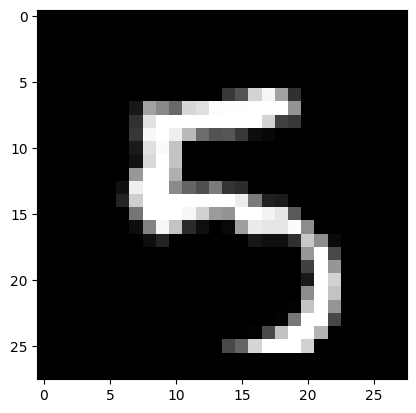

Prediction:  [1]
Label:  1


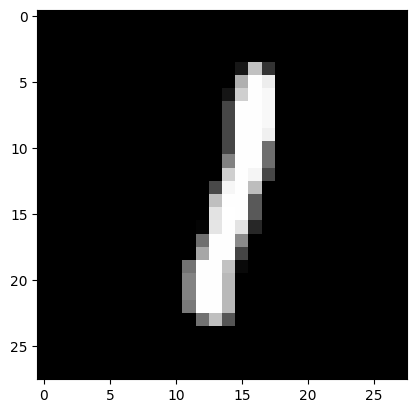

Prediction:  [6]
Label:  6


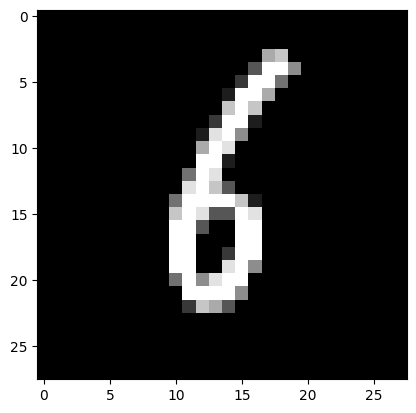

Prediction:  [5]
Label:  5


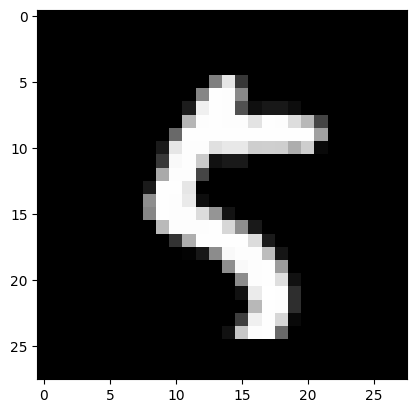

In [ ]:
test_prediction(3, W1, b1, W2, b2)
test_prediction(0, W1, b1, W2, b2)
test_prediction(10, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)

In [ ]:
print(Y_train)

[1 7 1 ... 6 0 4]


Prediction:  [1]
Label:  1


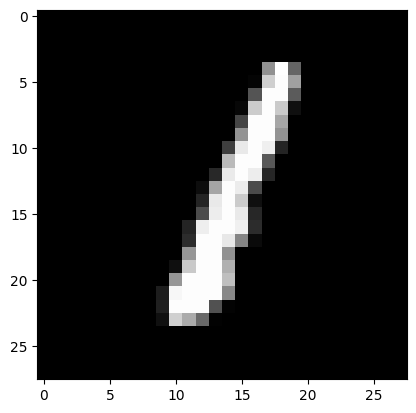

Prediction:  [7]
Label:  7


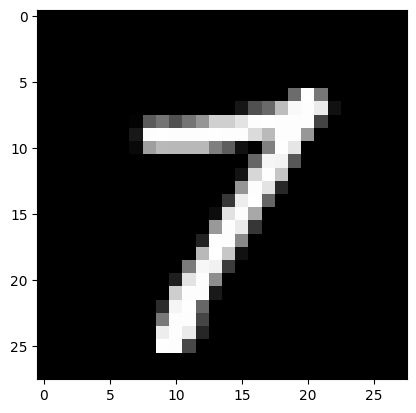

In [ ]:
test_prediction(2, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)